# Illustrative examples of MCDA methods: TOPSIS, CODAS, VIKOR, SPOTIS, EDAS, MABAC, MULTIMOORA, WASPAS, Compromise rankings, Sensitivity analysis

## Import necessary packages

Import of the necessary Python packages necessary for running codes provided in examples.

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib
from tabulate import tabulate

Import the necessary Python modules from `pyrepo-mcda` package.

In [2]:
from pyrepo_mcda.mcda_methods import CODAS, TOPSIS, WASPAS, VIKOR, SPOTIS, EDAS, MABAC, MULTIMOORA

from pyrepo_mcda import distance_metrics as dists
from pyrepo_mcda import correlations as corrs
from pyrepo_mcda import normalizations as norms
from pyrepo_mcda import weighting_methods as mcda_weights
from pyrepo_mcda import compromise_rankings as compromises
from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda.sensitivity_analysis_weights_percentages import Sensitivity_analysis_weights_percentages
from pyrepo_mcda.sensitivity_analysis_weights_values import Sensitivity_analysis_weights_values

## Examples of supporting functions

Import visualization methods from `visualizations.py`, including exemplary techniques for displaying charts provided in the `visualizations.py` file available in examples.

In [3]:
from visualizations import plot_barplot, draw_heatmap, plot_boxplot, plot_lineplot_sensitivity, plot_barplot_sensitivity, plot_radar, plot_boxplot_simulation

Sample class for creating a dictionary. It will help collect correlation values between different rankings.

In [4]:
# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

## Loading data from CSV file

You can provide a decision matrix, criteria weights, and types directly in your code in NumPy arrays. You can also load input data from a CSV file. In the provided exemplary CSV file `data.csv`, there are alternatives in the rows ($A_i$) and criteria in the columns ($C_j$). The last row (types) of the data frame contains criteria types (with values 1 for profit and -1 for cost criteria), and the second-to-last row (weights) contains criteria weights (their sum must be equal to 1)

Create a dataframe with a decision matrix `df_data` and NumPy arrays of weights `weights` and criteria types `types`

In [5]:
data = pd.read_csv('data.csv', index_col = 'Ai')

# loading input data from a file using the pandas package into a dataframe
df_data = data.iloc[:len(data) - 2, :]
weights = data.iloc[len(data) - 2, :].to_numpy()
types = data.iloc[len(data) - 1, :].to_numpy()

Display the decision matrix as a dataframe. In this case, we used a nice-looking way to print the dataframe, which is performed using `tabulate`.

In [6]:
header = [df_data.index.name]
header = header + list(df_data.columns)
print(tabulate(df_data, headers = header, tablefmt='github'))

| Ai   |   C1 |   C2 |   C3 |   C4 |
|------|------|------|------|------|
| A1   |   45 | 3600 |   45 |  0.9 |
| A2   |   25 | 3800 |   60 |  0.8 |
| A3   |   23 | 3100 |   35 |  0.9 |
| A4   |   14 | 3400 |   50 |  0.7 |
| A5   |   15 | 3300 |   40 |  0.8 |
| A6   |   28 | 3000 |   30 |  0.6 |


In [7]:
print(weights)

[0.2857 0.3036 0.2321 0.1786]


In [8]:
print(types)

[ 1. -1.  1.  1.]


Converting a decision matrix data frame `df_data` to a NumPy array `matrix` to use the NumPy package for computation

In [9]:
matrix = df_data.to_numpy()

Create an index list `list_alt_names` and data frame for collecting results `rank_results` indexed by 'Ai'

In [10]:
list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
list_crit_names = [r'$C_{' + str(i) + '}$' for i in range(1, df_data.shape[1] + 1)]

In [11]:
rank_results = pd.DataFrame()
rank_results['Ai'] = list(list_alt_names)

## TOPSIS
Create the TOPSIS method object. The default normalization type for this method is Min-Max normalization `minmax_normalization`, and the default distance metric for determining the distance to ideal (PIS) and non-ideal (NIS) solutions is Euclidean distance. However, other normalization methods from the `normalizations` module and other distance metrics from the `distance_metrics` module for investigations and simulations can be applied. In the TOPSIS method, the ranking of the alternatives is created by sorting the preferences in descending order (the best alternative has the highest preference value). Therefore the `reverse = True` parameter is used in the `rank_preferences` function to call descending ordering.

In [12]:
# TOPSIS
# TOPSIS preference values (preferences) must be sorted in descending order
topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)
pref = topsis(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['TOPSIS'] = rank

## CODAS
Create the CODAS method object. The default and recommended normalization type for this method is linear normalization `linear_normalization,` and the default distance metric for determining the distance to a non-ideal (NIS) solution is Euclidean distance. However, other distance metrics from the `distance_metrics` module for investigations and simulations can be applied. In the CODAS method, the ranking of the alternatives is created by sorting the preferences in descending order (the best option has the highest preference value). Therefore the `reverse = True` parameter is used in the `rank_preferences` function to call descending ordering.

In [13]:
# CODAS
# CODAS preference values (preferences) must be sorted descending order
codas = CODAS(normalization_method = norms.linear_normalization, distance_metric = dists.euclidean, tau = 0.02)
pref = codas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['CODAS'] = rank

## VIKOR
Create the VIKOR method object. VIKOR can be executed without normalization (parameter `normalization_method = None`), but any normalization technique from the `normalizations` package can also be used. This method does not use distance metrics because its algorithm individually computes the distance from reference solutions. In the VIKOR method, the ranking of the alternatives is created by sorting the preferences in ascending order (the best alternative has the lowest preference value). Therefore the `reverse = False` parameter is used in the `rank_preferences` function to call ascending ordering.

In [14]:
#VIKOR
# VIKOR preferences must be sorted in ascending order
vikor = VIKOR(normalization_method = norms.minmax_normalization)
pref = vikor(matrix, weights, types)
rank = rank_preferences(pref, reverse = False)
rank_results['VIKOR'] = rank

## SPOTIS
Create a SPOTIS method object. A unique algorithm performs normalization in the SPOTIS method, so the parameter of normalization type is not given. SPOTIS requires bounds, where `bounds_min` denotes the minimum, and `bounds_max` denotes the maximum values of the criteria considered in the problem being solved. Bounds are needed to determine the ideal ISP solution, consisting of maximum bounds values for profit criteria and minimum bounds values for cost criteria. In the SPOTIS method, the ranking of the alternatives is created by sorting the preferences in ascending order (the best option has the lowest preference value). Therefore the `reverse = False` parameter is used in the `rank_preferences` function to call ascending ordering.

In [15]:
# SPOTIS
# SPOTIS preferences must be sorted in ascending order
bounds_min = np.amin(matrix, axis = 0)
bounds_max = np.amax(matrix, axis = 0)
bounds = np.vstack((bounds_min, bounds_max))
spotis = SPOTIS()
pref = spotis(matrix, weights, types, bounds)
rank = rank_preferences(pref, reverse = False)
rank_results['SPOTIS'] = rank

## EDAS
Create the EDAS method object. A unique algorithm performs normalization in the EDAS method, so the parameter of normalization type is not given. In the EDAS method, the ranking of the alternatives is created by sorting the preferences in descending order (the best option has the highest preference value). Therefore the `reverse = True` parameter is used in the `rank_preferences` function to call descending ordering.

In [16]:
# EDAS 
# EDAS preferences must be sorted in descending order
edas = EDAS()
pref = edas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['EDAS'] = rank

## MABAC
Create the MABAC method object. The default and recommended normalization type for this method is Minimum-Maximum normalization. In the MABAC method, the ranking of the alternatives is created by sorting the preferences in descending order (the best option has the highest preference value). Therefore the `reverse = True` parameter is used in the `rank_preferences` function to call descending ordering.

In [17]:
# MABAC
# MABAC preferences must be sorted in descending order
mabac = MABAC(normalization_method = norms.minmax_normalization)
pref = mabac(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['MABAC'] = rank

## MULTIMOORA
Create the MULTIMOORA method object. This method involves determining by majority voting a ranking from the three rankings provided by the three integrated approaches:
- Ratio System Approach (`MULTIMOORA_RS` in `multimoora` module, preferences sorted in descending order)
- Reference Point Approach (`MULTIMOORA_RP` in `multimoora` module, preferences sorted in ascending order)
- Full Multiplicative Form (`MULTIMOORA_FMF` in `multimoora` module, preferences sorted in descending order)

In these approaches, an individual type of normalization is performed. It is vector normalization, performed for all criteria, like for the profit criteria. This normalization technique, especially for MOORA and MULTIMOORA methods, is provided in `normalizations` and named `multimoora_normalization`. The MULTIMOORA method provides a ready ranking of alternatives.

In [18]:
# MULTIMOORA
# MULTIMOORA method returns rank
multimoora = MULTIMOORA()
rank = multimoora(matrix, weights, types)
rank_results['MMOORA'] = rank

## WASPAS
Create the WASPAS method object. This method's default and recommended normalization type is linear normalization `linear_normalization`. This method requires an additional lambda parameter `lambda_param` in the range 0 to 1, (0, 0.1, 0.2, ..., 1).

In [19]:
# WASPAS
# WASPAS preferences must be sorted in descending order
waspas = WASPAS(normalization_method = norms.linear_normalization, lambda_param = 0.5)
pref = waspas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['WASPAS'] = rank

Display a data frame with the rankings provided by each method.

In [20]:
rank_results = rank_results.set_index('Ai')
header = [rank_results.index.name]
header = header + list(rank_results.columns)
print(tabulate(rank_results, headers = header, tablefmt='orgtbl'))

| Ai      |   TOPSIS |   CODAS |   VIKOR |   SPOTIS |   EDAS |   MABAC |   MMOORA |   WASPAS |
|---------+----------+---------+---------+----------+--------+---------+----------+----------|
| $A_{1}$ |        1 |       1 |       1 |        1 |      1 |       1 |        1 |        1 |
| $A_{2}$ |        4 |       2 |       5 |        3 |      2 |       3 |        2 |        2 |
| $A_{3}$ |        2 |       3 |       2 |        2 |      3 |       2 |        3 |        3 |
| $A_{4}$ |        6 |       5 |       6 |        6 |      6 |       6 |        5 |        5 |
| $A_{5}$ |        5 |       6 |       4 |        5 |      5 |       5 |        4 |        6 |
| $A_{6}$ |        3 |       4 |       3 |        4 |      4 |       4 |        3 |        4 |


## Compromise ranking generated with the Copeland method
In the following stage, one compromise ranking is created based on the received rankings by method `copeland` provided in `compromise_rankings` module.

In [21]:
compromise_ranking = compromises.copeland(rank_results)

rank_results_final = copy.deepcopy(rank_results)
rank_results_final['Compromise'] = compromise_ranking
header = [rank_results_final.index.name]
header = header + list(rank_results_final.columns)
print(tabulate(rank_results_final, headers = header, tablefmt='github'))

| Ai      |   TOPSIS |   CODAS |   VIKOR |   SPOTIS |   EDAS |   MABAC |   MMOORA |   WASPAS |   Compromise |
|---------|----------|---------|---------|----------|--------|---------|----------|----------|--------------|
| $A_{1}$ |        1 |       1 |       1 |        1 |      1 |       1 |        1 |        1 |            1 |
| $A_{2}$ |        4 |       2 |       5 |        3 |      2 |       3 |        2 |        2 |            3 |
| $A_{3}$ |        2 |       3 |       2 |        2 |      3 |       2 |        3 |        3 |            2 |
| $A_{4}$ |        6 |       5 |       6 |        6 |      6 |       6 |        5 |        5 |            6 |
| $A_{5}$ |        5 |       6 |       4 |        5 |      5 |       5 |        4 |        6 |            5 |
| $A_{6}$ |        3 |       4 |       3 |        4 |      4 |       4 |        3 |        4 |            4 |


Display rankings provided by different MCDA methods using an exemplary method named `plot_barplot` for visualization.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


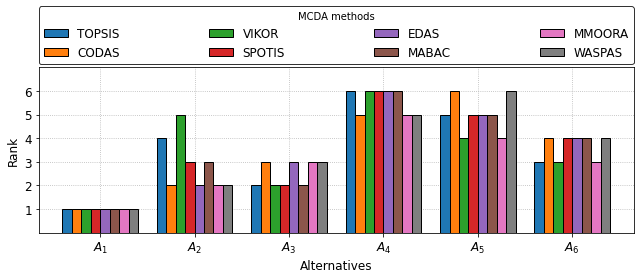

In [22]:
df_plot = copy.deepcopy(rank_results)
plot_barplot(df_plot, 'MCDA methods')

## Sensitivity analysis
### Sensitivity analysis with percentage modification of chosen criterion weights
Sensitivity analysis is a valuable procedure for determining the sensitivity of alternatives to changes in input data. In this case, the effect of modifying the values of the criteria weights by given percentage values is investigated. First, the percentages by which the weights of each criterion are decreased or increased are input into the vector named `percentages`. The remaining weights are then changed equivalently by the appropriate value so that the sum of all weights still equals 1. Sequentially, the sensitivity analysis is performed in the `_sensitivity_analysis_weights_percentages` function provided in `sensitivity_analysis_weights_percentages` module in class `Sensitivity_analysis_weights_percentages`. Sensitivity analysis is performed for the chosen criterion for the selected MCDA method's initialized object. Finally, the results are visualized as a dataframe, column, and line chart. Visualization is performed using an exemplary method named `plot_lineplot_sensitivity` provided in examples in `visualizations.py` file.

Sensitivity analysis for C1
| Ai      |   -45% |   -35% |   -25% |   -15% |   -5% |   5% |   15% |   25% |   35% |   45% |
|---------|--------|--------|--------|--------|-------|------|-------|-------|-------|-------|
| $A_{1}$ |      2 |      2 |      2 |      2 |     1 |    1 |     1 |     1 |     1 |     1 |
| $A_{2}$ |      6 |      6 |      5 |      4 |     4 |    4 |     4 |     4 |     4 |     4 |
| $A_{3}$ |      1 |      1 |      1 |      1 |     2 |    2 |     2 |     2 |     3 |     3 |
| $A_{4}$ |      5 |      5 |      6 |      6 |     6 |    6 |     6 |     6 |     6 |     6 |
| $A_{5}$ |      3 |      4 |      4 |      5 |     5 |    5 |     5 |     5 |     5 |     5 |
| $A_{6}$ |      4 |      3 |      3 |      3 |     3 |    3 |     3 |     3 |     2 |     2 |


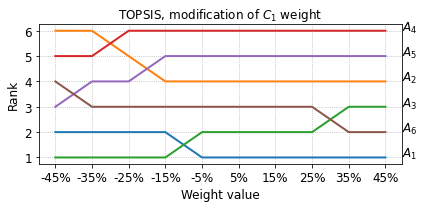

Sensitivity analysis for C2
| Ai      |   -45% |   -35% |   -25% |   -15% |   -5% |   5% |   15% |   25% |   35% |   45% |
|---------|--------|--------|--------|--------|-------|------|-------|-------|-------|-------|
| $A_{1}$ |      1 |      1 |      1 |      1 |     1 |    1 |     2 |     3 |     3 |     4 |
| $A_{2}$ |      2 |      2 |      2 |      3 |     4 |    4 |     6 |     6 |     6 |     6 |
| $A_{3}$ |      3 |      3 |      3 |      2 |     2 |    2 |     1 |     1 |     1 |     1 |
| $A_{4}$ |      4 |      5 |      6 |      6 |     6 |    6 |     5 |     5 |     5 |     5 |
| $A_{5}$ |      6 |      6 |      5 |      5 |     5 |    5 |     4 |     4 |     4 |     3 |
| $A_{6}$ |      5 |      4 |      4 |      4 |     3 |    3 |     3 |     2 |     2 |     2 |


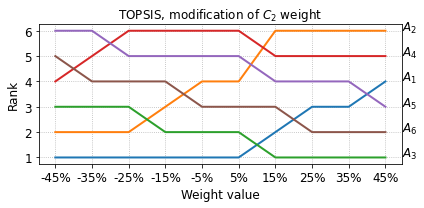

Sensitivity analysis for C3
| Ai      |   -45% |   -35% |   -25% |   -15% |   -5% |   5% |   15% |   25% |   35% |   45% |
|---------|--------|--------|--------|--------|-------|------|-------|-------|-------|-------|
| $A_{1}$ |      1 |      1 |      1 |      1 |     1 |    1 |     1 |     1 |     1 |     1 |
| $A_{2}$ |      5 |      5 |      5 |      5 |     4 |    4 |     4 |     3 |     2 |     2 |
| $A_{3}$ |      2 |      2 |      2 |      2 |     2 |    2 |     2 |     2 |     3 |     3 |
| $A_{4}$ |      6 |      6 |      6 |      6 |     6 |    6 |     5 |     5 |     5 |     4 |
| $A_{5}$ |      4 |      4 |      4 |      4 |     5 |    5 |     6 |     6 |     6 |     6 |
| $A_{6}$ |      3 |      3 |      3 |      3 |     3 |    3 |     3 |     4 |     4 |     5 |


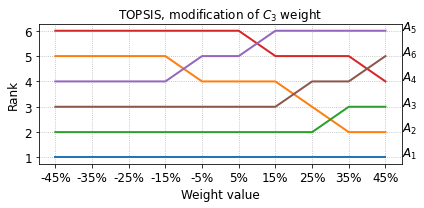

Sensitivity analysis for C4
| Ai      |   -45% |   -35% |   -25% |   -15% |   -5% |   5% |   15% |   25% |   35% |   45% |
|---------|--------|--------|--------|--------|-------|------|-------|-------|-------|-------|
| $A_{1}$ |      1 |      1 |      1 |      1 |     1 |    1 |     1 |     1 |     1 |     1 |
| $A_{2}$ |      4 |      4 |      4 |      4 |     4 |    4 |     4 |     4 |     4 |     3 |
| $A_{3}$ |      3 |      3 |      2 |      2 |     2 |    2 |     2 |     2 |     2 |     2 |
| $A_{4}$ |      5 |      5 |      6 |      6 |     6 |    6 |     6 |     6 |     6 |     6 |
| $A_{5}$ |      6 |      6 |      5 |      5 |     5 |    5 |     5 |     5 |     5 |     5 |
| $A_{6}$ |      2 |      2 |      3 |      3 |     3 |    3 |     3 |     3 |     3 |     4 |


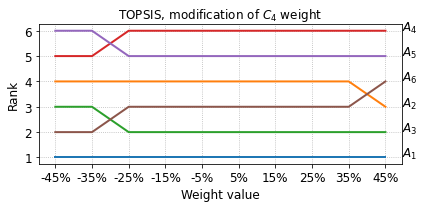

In [23]:
#sensitivity analysis
# load input vector with percentage values of chosen criterion weights modification for sensitivity analysis
# percentages = np.arange(0.25, 0.55, 0.1)
percentages = np.arange(0.05, 0.55, 0.1)

#create the chosen MCDA object
method = TOPSIS(normalization_method=norms.minmax_normalization, distance_metric=dists.euclidean)

# Create the sensitivity analysis method object
sensitivity_analysis = Sensitivity_analysis_weights_percentages()

# Perform sensitivity analysis with weights modification for chosen criteria
for j in [0, 1, 2, 3]:
    data_sens = sensitivity_analysis(matrix, weights, types, percentages, method, j, [-1, 1])

    header = [data_sens.index.name]
    header = header + list(data_sens.columns)
    print('Sensitivity analysis for C' + str(j + 1))
    print(tabulate(data_sens, headers = header, tablefmt='github'))

    plot_lineplot_sensitivity(data_sens, method.__class__.__name__, list_crit_names[j], "Weight value", "value")

### Sensitivity analysis with setting chosen values as selected criterion weight
The second sensitivity analysis method is provided in module `sensitivity_analysis_weights_values` in class `Sensitivity_analysis_weights_values`. It investigates the effect of setting different values from 0 to 1 as chosen criterion weight.

Sensitivity analysis for C1
| Ai      |   0.05 |   0.15 |   0.25 |   0.35 |   0.45 |   0.55 |   0.65 |   0.75 |   0.85 |
|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $A_{1}$ |      2 |      2 |      1 |      1 |      1 |      1 |      1 |      1 |      1 |
| $A_{2}$ |      4 |      3 |      3 |      3 |      3 |      3 |      3 |      3 |      3 |
| $A_{3}$ |      1 |      1 |      2 |      2 |      2 |      4 |      4 |      4 |      4 |
| $A_{4}$ |      5 |      5 |      6 |      6 |      6 |      6 |      6 |      6 |      6 |
| $A_{5}$ |      3 |      4 |      4 |      5 |      5 |      5 |      5 |      5 |      5 |
| $A_{6}$ |      6 |      6 |      5 |      4 |      4 |      2 |      2 |      2 |      2 |


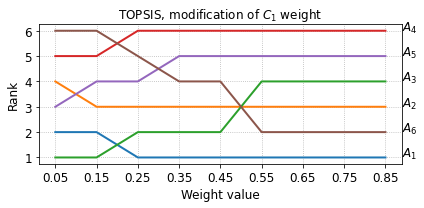

Sensitivity analysis for C2
| Ai      |   0.05 |   0.15 |   0.25 |   0.35 |   0.45 |   0.55 |   0.65 |   0.75 |   0.85 |
|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $A_{1}$ |      1 |      1 |      1 |      2 |      4 |      5 |      5 |      5 |      5 |
| $A_{2}$ |      2 |      2 |      3 |      6 |      6 |      6 |      6 |      6 |      6 |
| $A_{3}$ |      3 |      3 |      2 |      1 |      1 |      1 |      1 |      2 |      2 |
| $A_{4}$ |      5 |      5 |      6 |      5 |      5 |      4 |      4 |      4 |      4 |
| $A_{5}$ |      4 |      4 |      4 |      4 |      3 |      3 |      3 |      3 |      3 |
| $A_{6}$ |      6 |      6 |      5 |      3 |      2 |      2 |      2 |      1 |      1 |


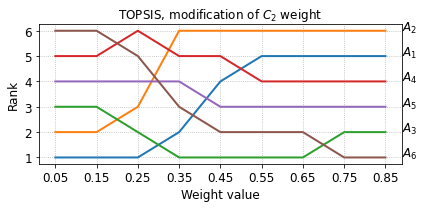

Sensitivity analysis for C3
| Ai      |   0.05 |   0.15 |   0.25 |   0.35 |   0.45 |   0.55 |   0.65 |   0.75 |   0.85 |
|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $A_{1}$ |      1 |      1 |      1 |      1 |      2 |      3 |      3 |      3 |      3 |
| $A_{2}$ |      5 |      5 |      3 |      2 |      1 |      1 |      1 |      1 |      1 |
| $A_{3}$ |      2 |      2 |      2 |      3 |      4 |      5 |      5 |      5 |      5 |
| $A_{4}$ |      6 |      6 |      6 |      4 |      3 |      2 |      2 |      2 |      2 |
| $A_{5}$ |      4 |      4 |      4 |      5 |      5 |      4 |      4 |      4 |      4 |
| $A_{6}$ |      3 |      3 |      5 |      6 |      6 |      6 |      6 |      6 |      6 |


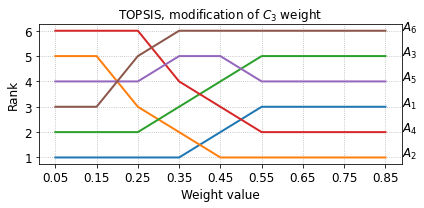

Sensitivity analysis for C4
| Ai      |   0.05 |   0.15 |   0.25 |   0.35 |   0.45 |   0.55 |   0.65 |   0.75 |   0.85 |
|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $A_{1}$ |      1 |      1 |      1 |      1 |      1 |      1 |      1 |      1 |      1 |
| $A_{2}$ |      3 |      3 |      3 |      3 |      3 |      3 |      3 |      3 |      3 |
| $A_{3}$ |      4 |      2 |      2 |      2 |      2 |      2 |      2 |      2 |      2 |
| $A_{4}$ |      5 |      5 |      6 |      5 |      5 |      5 |      5 |      5 |      5 |
| $A_{5}$ |      6 |      6 |      4 |      4 |      4 |      4 |      4 |      4 |      4 |
| $A_{6}$ |      2 |      4 |      5 |      6 |      6 |      6 |      6 |      6 |      6 |


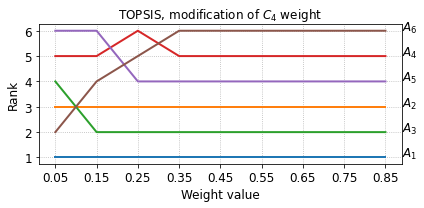

In [24]:
# Perform sensitivity analysis with setting chosen weight value to selected criterion
# other criteria have equal weight values and all criteria weights sum to 1
sensitivity_analysis_weights_values = Sensitivity_analysis_weights_values()
weight_values = np.arange(0.05, 0.95, 0.1)
for j in [0, 1, 2, 3]:
    data_sens = sensitivity_analysis_weights_values(matrix, weight_values, types, method, j)
    header = [data_sens.index.name]
    header = header + list(data_sens.columns)
    print('Sensitivity analysis for C' + str(j + 1))
    print(tabulate(data_sens, headers = header, tablefmt='github'))
    plot_lineplot_sensitivity(data_sens, method.__class__.__name__, list_crit_names[j], "Weight value", "value")

An example of another exemplary kind of chart for sensitivity analysis results visualization is the Bar chart `plot_barplot_sensitivity` provided in `visualizations.py` in examples.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


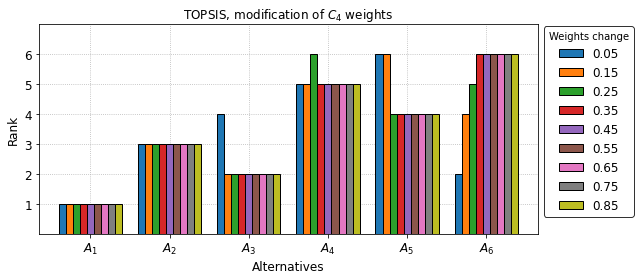

In [25]:
plot_barplot_sensitivity(data_sens, method.__class__.__name__, list_crit_names[j], "weight_values_bar")

Example of using another exemplary kind of chart for sensitivity analysis results visualization: Radar chart `plot_radar` provided in `visualizations.py` in examples.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


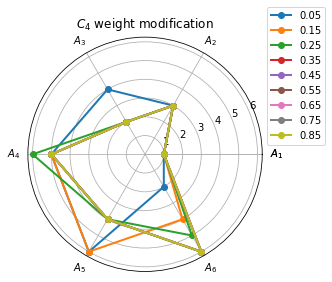

In [26]:
plot_radar(data_sens, list_crit_names[j] + ' weight modification', j)

## Comparative analysis of distance metrics

Results of TOPSIS method using different chosen distance metrics

In [27]:
# Create a list with distance metrics chosen from module `distance metrics`
distance_metrics = [
    dists.euclidean,
    dists.manhattan,
    dists.hausdorff,
    dists.chebyshev,
    dists.bray_curtis,
    dists.canberra,
    dists.lorentzian,
    dists.jaccard
]

# Create dataframes for preference function values and rankings determined using distance metrics
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

for distance_metric in distance_metrics:
    # Create the TOPSIS method object
    topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = distance_metric)
    pref = topsis(matrix, weights, types)
    rank = rank_preferences(pref, reverse = True)
    df_preferences[distance_metric.__name__.capitalize().replace('_', ' ')] = pref
    df_rankings[distance_metric.__name__.capitalize().replace('_', ' ')] = rank

df_rankings

,Euclidean,Manhattan,Hausdorff,Chebyshev,Bray curtis,Canberra,Lorentzian,Jaccard
$A_{1}$,1,1,2,1,1,1,1,1
$A_{2}$,4,3,4,4,3,4,3,5
$A_{3}$,2,2,1,2,2,2,2,2
$A_{4}$,6,6,5,6,6,5,6,6
$A_{5}$,5,5,3,5,5,3,5,4
$A_{6}$,3,4,4,3,4,6,4,3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


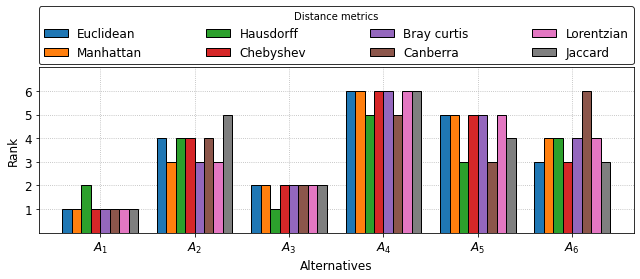

In [28]:
# plot box chart of alternatives preference values
plot_barplot(df_rankings, 'Distance metrics')

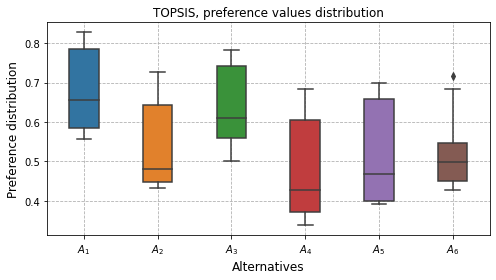

In [29]:
# plot box chart of alternatives preference values
plot_boxplot(df_preferences.T, 'TOPSIS, preference values distribution')

## Robustness analysis
Robustness analysis is performed to indicate the intervals of the performance values of the alternatives concerning the selected criteria for which the alternatives hold particular ranking positions. Finally, results are displayed using the exemplary visualization method named `plot_boxplot_simulation` provided in `visualizations.py` in examples.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


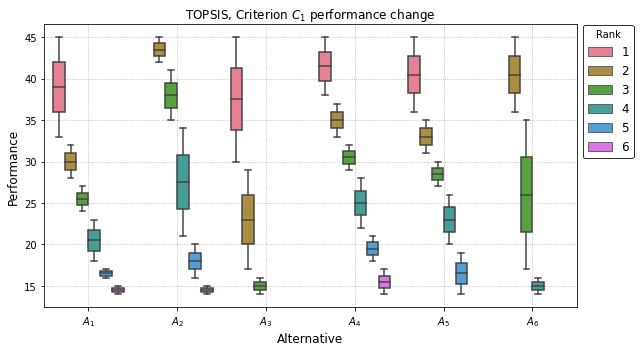

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


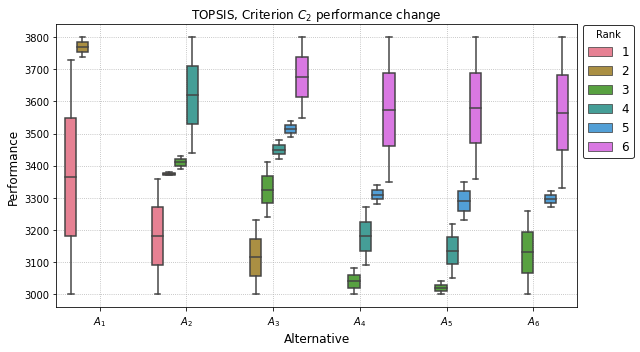

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


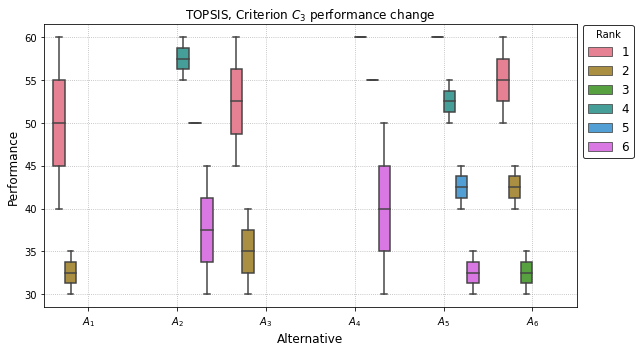

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


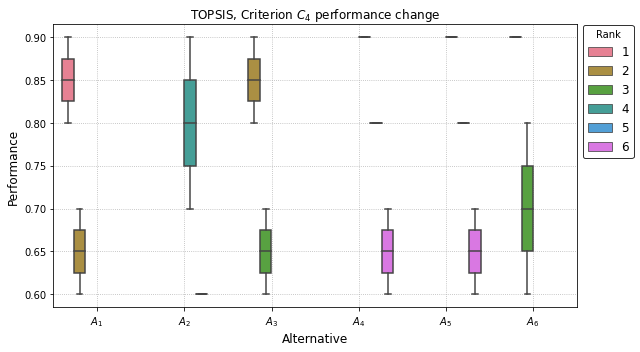

In [30]:
# Robustness analysis
# Create object of chosen MCDA method
topsis = TOPSIS(normalization_method=norms.minmax_normalization, distance_metric=dists.euclidean)

# Create minimum bounds of criteria performance
bounds_min = np.amin(matrix, axis = 0)
# Create maximum bounds of criteria performance
bounds_max = np.amax(matrix, axis = 0)
bounds = np.vstack((bounds_min, bounds_max))

# Create ideal Solution `isp`
isp = np.zeros(matrix.shape[1])
isp[types == 1] = bounds[1, types == 1]
isp[types == -1] = bounds[0, types == -1]

# Create anti-Ideal Solution `asp`
asp = np.zeros(matrix.shape[1])
asp[types == 1] = bounds[0, types == 1]
asp[types == -1] = bounds[1, types == -1]

# Create dictionary with values of stepwise particular criteria performance change
indexes = {
    0 : 1,
    1 : 10,
    2 : 5,
    3 : 0.1
}

# Perform simulation for each criterion
# Iterate by all criteria
for j in range(matrix.shape[1]):
    change_val = indexes[j]
    # dictionary for collecting variability in TOPSIS preferences after weights change using different distance metrics
    dict_results_sim = {
        'Rank' : [],
        'Performance' : [],
        'Alternative' : []
        }
    # Iterate by all Alternatives
    for i in range(matrix.shape[0]):
        vec = np.arange(asp[j], isp[j] + types[j] * change_val, types[j] * change_val)
        for v in vec:
            new_matrix = copy.deepcopy(matrix)
            new_matrix[i, j] = v
            pref = topsis(new_matrix, weights, types)
            rank = rank_preferences(pref, reverse = True)
            dict_results_sim['Rank'].append(rank[i])
            dict_results_sim['Performance'].append(v)
            dict_results_sim['Alternative'].append(list_alt_names[i])

    df_results_sim = pd.DataFrame(dict_results_sim)

    plot_boxplot_simulation(df_results_sim, 'Alternative', 'Performance', 'Rank' , 'Alternative', 'Performance', 'TOPSIS, Criterion ' + list_crit_names[j] + ' performance change', 'robustness_' + str(j + 1))

## Results correlations
Determination of the correlation between the rankings provided by each MCDA method using three correlation coefficients provided in the module named `correlations`:
- $r_s$ Spearman rank correlation coefficient `spearman`
- $r_w$ Weighted Spearman correlation coefficient `weighted_spearman`
- $WS$ Similarity rank correlation coefficient `WS_coeff`
- Pearson correlation coefficient `pearson_coeff`

First, a dataframe containing the correlation values between each pair of MCDA methods calculated using the coefficients available in the `correlations` module is created, and then it is visualized using the exemplary `draw_heatmap` visualization method provided in `visualizations.py`

### heat maps of correlations

In [31]:
data = copy.deepcopy(rank_results_final)
method_types = list(data.columns)

dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

dict_new_heatmap_ws = copy.deepcopy(dict_new_heatmap_rw)
dict_new_heatmap_pearson = copy.deepcopy(dict_new_heatmap_rw)
dict_new_heatmap_spearman = copy.deepcopy(dict_new_heatmap_rw)

# heatmaps for correlations coefficients
for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_rw[j].append(corrs.weighted_spearman(data[i], data[j]))
    dict_new_heatmap_ws[j].append(corrs.WS_coeff(data[i], data[j]))
    dict_new_heatmap_pearson[j].append(corrs.pearson_coeff(data[i], data[j]))
    dict_new_heatmap_spearman[j].append(corrs.spearman(data[i], data[j]))


df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

df_new_heatmap_ws = pd.DataFrame(dict_new_heatmap_ws, index = method_types[::-1])
df_new_heatmap_ws.columns = method_types

df_new_heatmap_pearson = pd.DataFrame(dict_new_heatmap_pearson, index = method_types[::-1])
df_new_heatmap_pearson.columns = method_types

df_new_heatmap_spearman = pd.DataFrame(dict_new_heatmap_spearman, index = method_types[::-1])
df_new_heatmap_spearman.columns = method_types

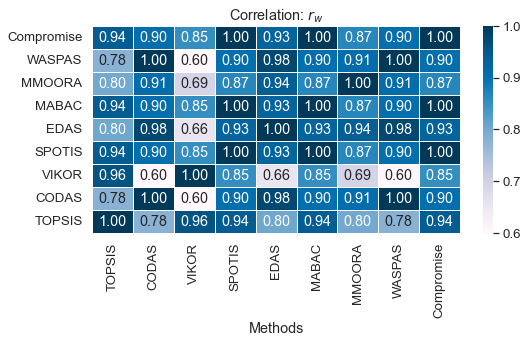

In [32]:
# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$')

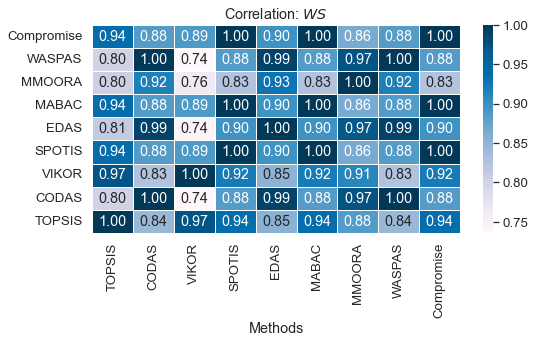

In [33]:
# correlation matrix with WS coefficient
draw_heatmap(df_new_heatmap_ws, r'$WS$')

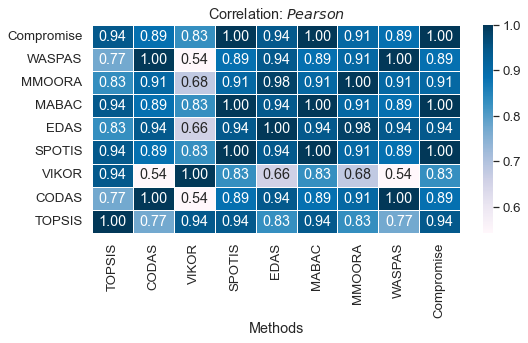

In [34]:
# correlation matrix with Pearson coefficient
draw_heatmap(df_new_heatmap_pearson, r'$Pearson$')

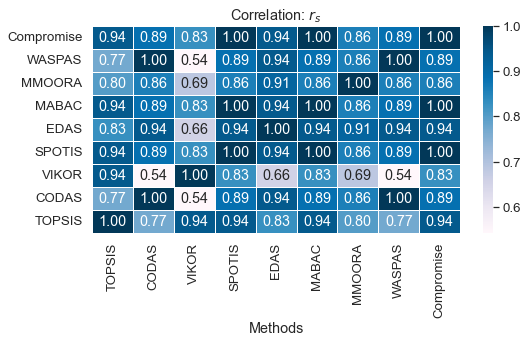

In [35]:
# correlation matrix with Spearman coefficient
draw_heatmap(df_new_heatmap_spearman, r'$r_s$')